<a href="https://colab.research.google.com/github/TheWiseGhost/Wheat_Unsupervised_ML/blob/main/Wheat_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

By M. Charytanowicz, J. Niewczas, P. Kulczycki, Piotr A. Kowalski, Szymon Łukasik, Slawomir Zak. 2010

Published in Information Technologies in Biomedicine

https://archive.ics.uci.edu/dataset/236/seeds

In [23]:
# Started 1/12/24
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [17]:
cols = ['Area', 'Perimeter', 'Compactness', 'Length', 'Width', 'Asymmetry', 'Length of Groove', 'Class']
df = pd.read_csv('/content/seeds.zip', names=cols, sep="\s+")
df.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length of Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


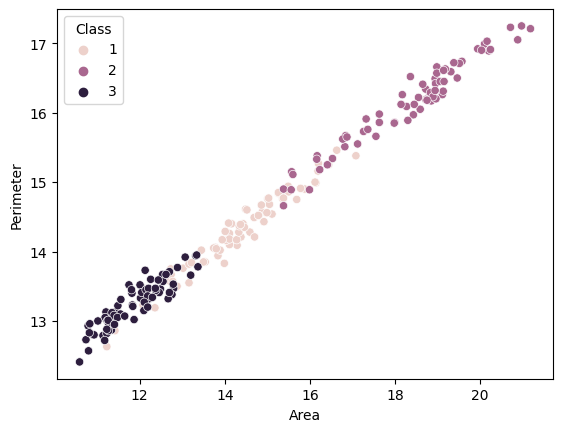

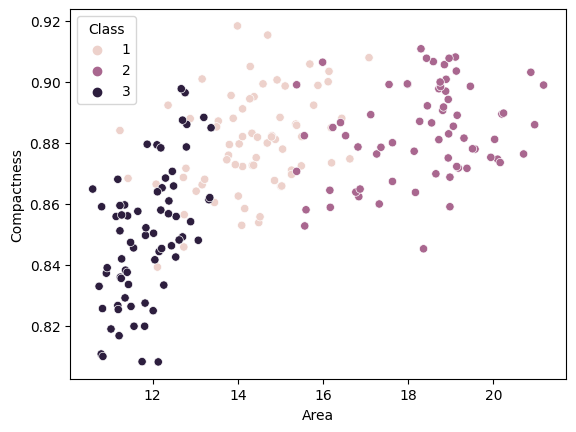

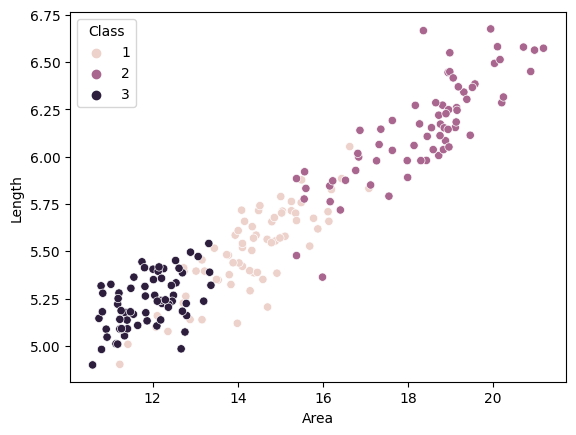

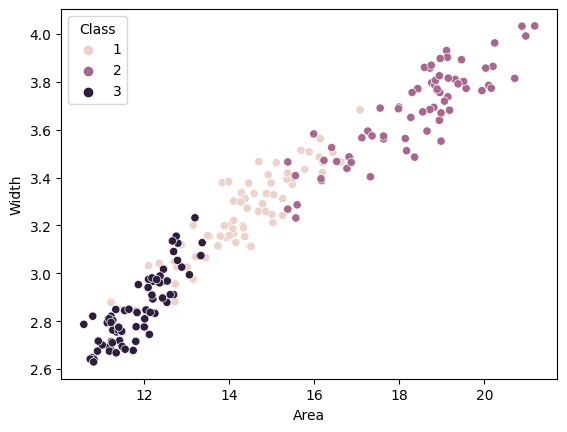

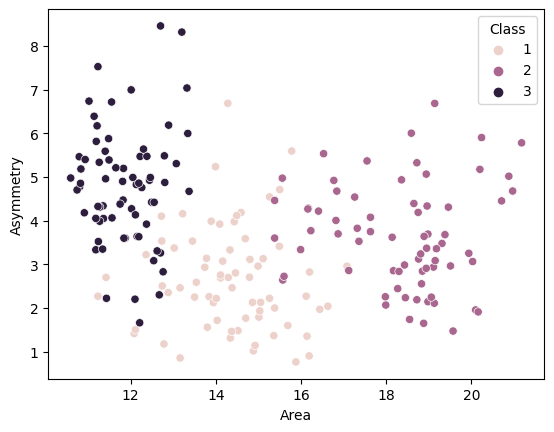

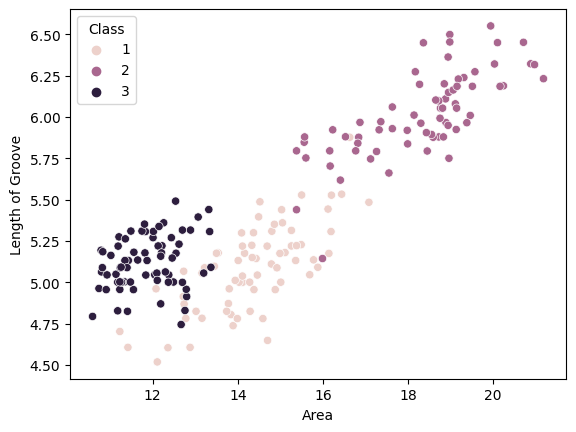

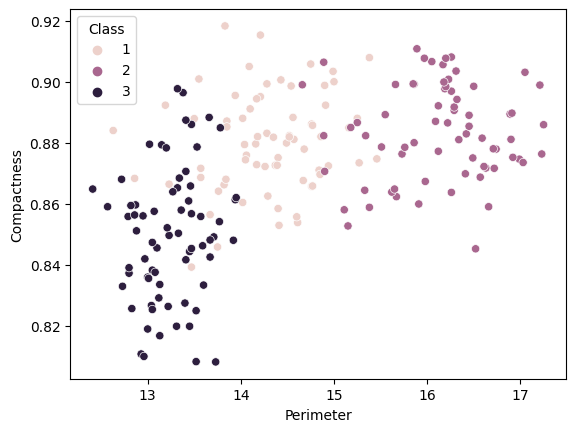

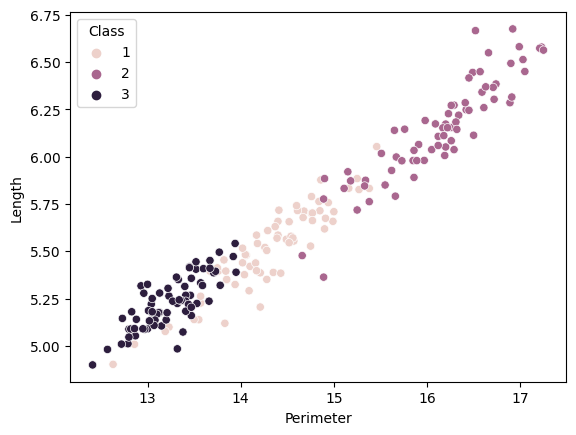

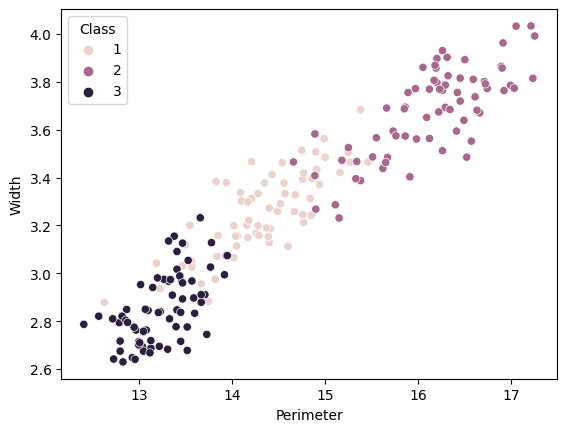

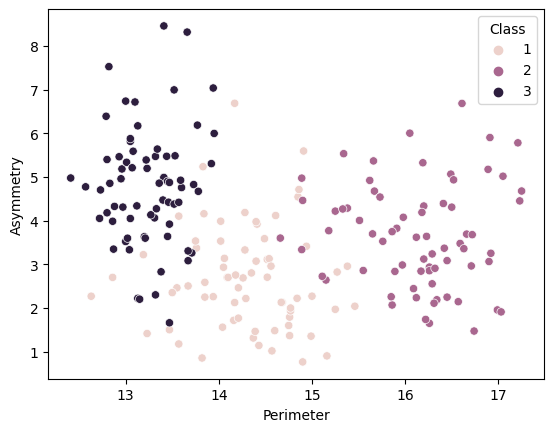

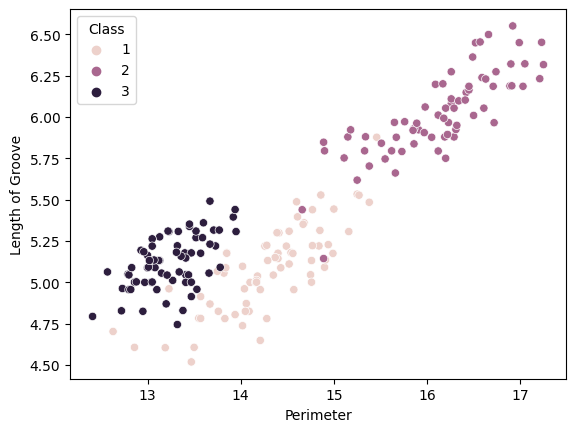

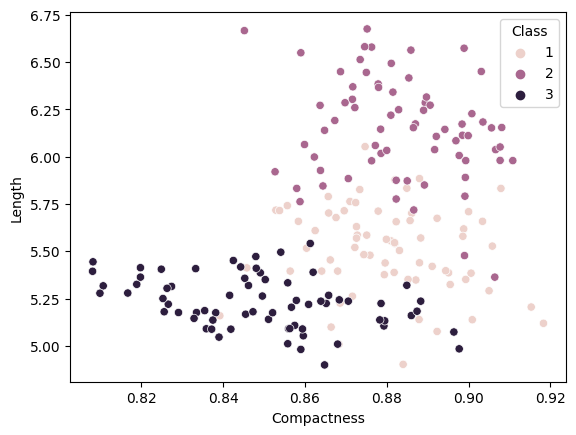

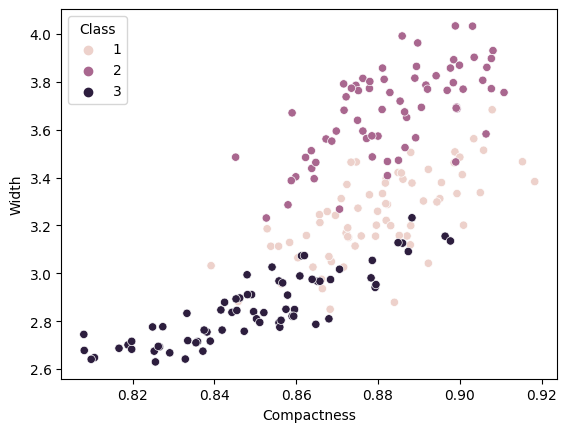

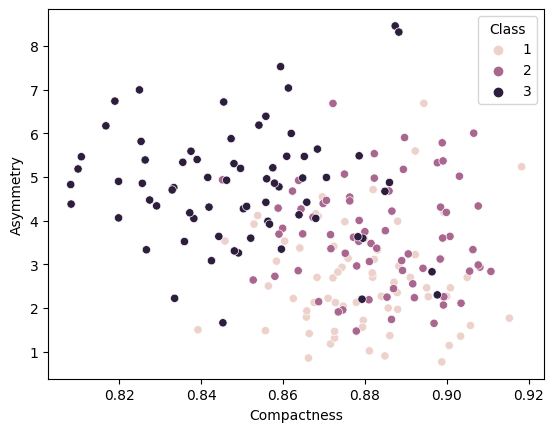

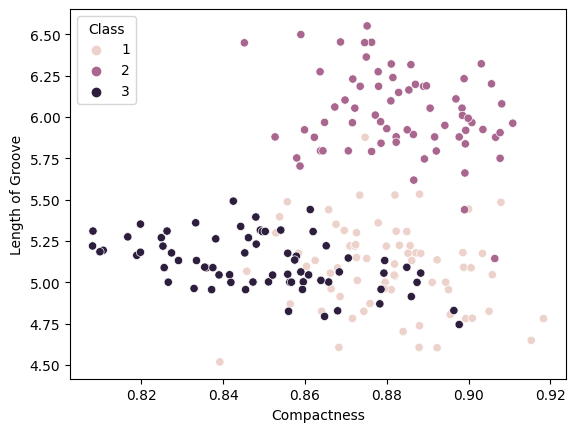

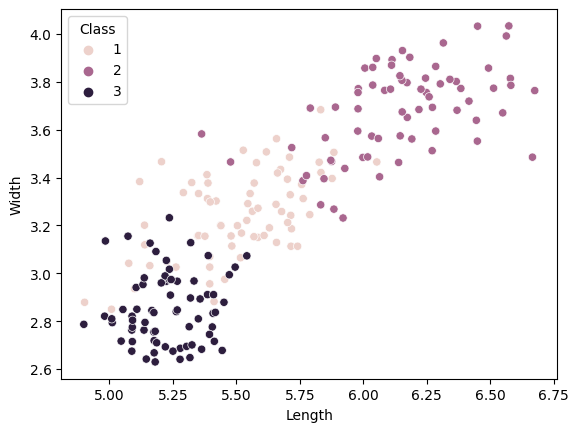

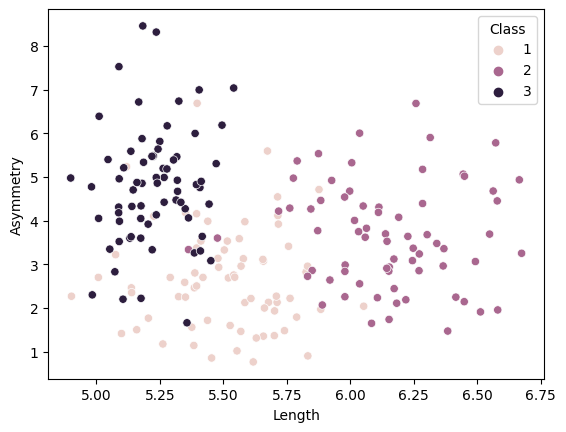

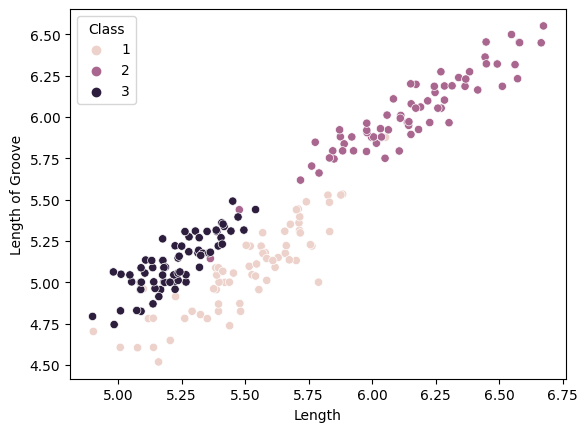

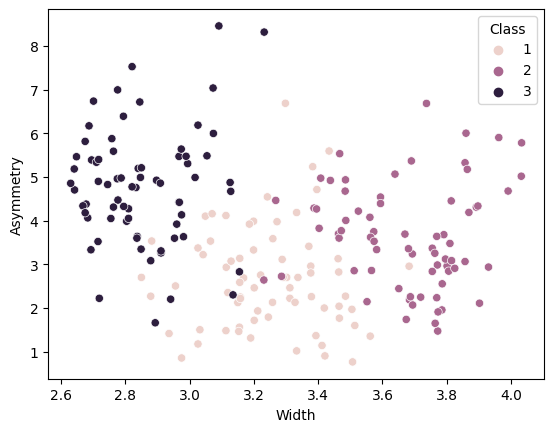

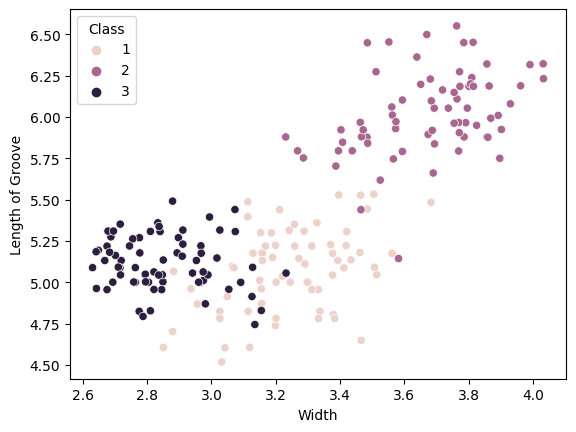

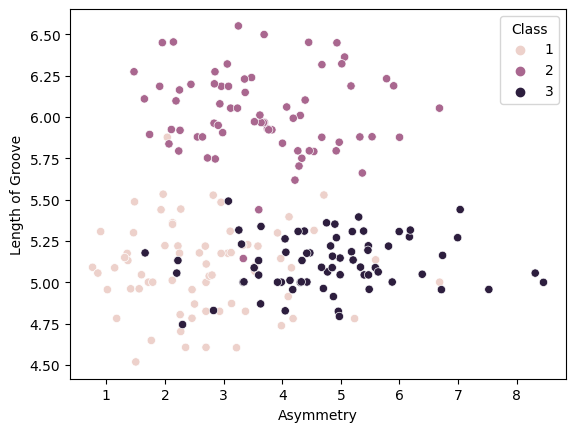

In [18]:
# So in unsupervised we are compared x0 and x1 and finding clusters
# Use this for all combinations of x0 and x1
for i in range(len(cols)-1):
  # Let j act as all possibilites for x1 for current x0
  for j in range(i+1, len(cols)-1):
    # Let xlabel be i which is x0
    xlabel = cols[i]
    # Let ylabel be j which is x1
    ylabel = cols[j]
    sns.scatterplot(x=xlabel, y=ylabel, data=df, hue='Class')
    plt.show()

# Clustering Method


In [19]:
x = 'Perimeter'
y = 'Length of Groove'
x_values = df[[x, y]].values

In [20]:
kmeans_model = KMeans(n_clusters=3).fit(x_values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
clusters = kmeans_model.labels_
clusters = clusters.reshape(-1, 1)
clusters_df = pd.DataFrame(np.hstack((x_values, clusters)), columns=[x, y, 'Class'])

<Axes: xlabel='Perimeter', ylabel='Length of Groove'>

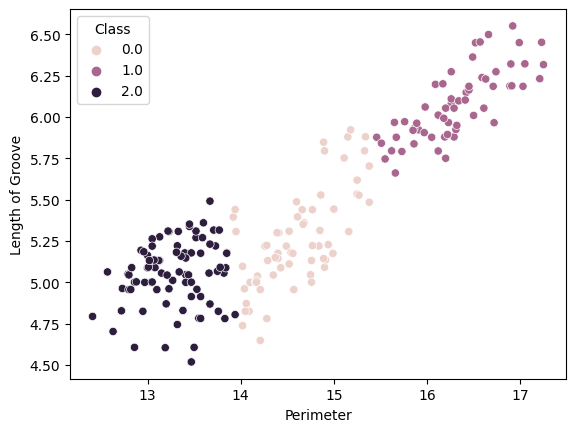

In [22]:
sns.scatterplot(x=x, y=y, data=clusters_df, hue='Class')
# Now the model actually chooses the clusters

KMeans is just useful for seeing potential clusters and it is useful in some statistics scenarios. Ex. want to use block design so you find clusters of similar data or you want to do a cluster sample.

# PCA


In [58]:
x_values = df[df.columns[:-1]].values
pca_model = PCA(n_components=2)
# Now x_values only has 2 features not 7
# These two features are the ones with the most variance
# PCA maps x0 and x1 into 1D and these 2 create line with most variance
x_values = pca_model.fit_transform(x_values)

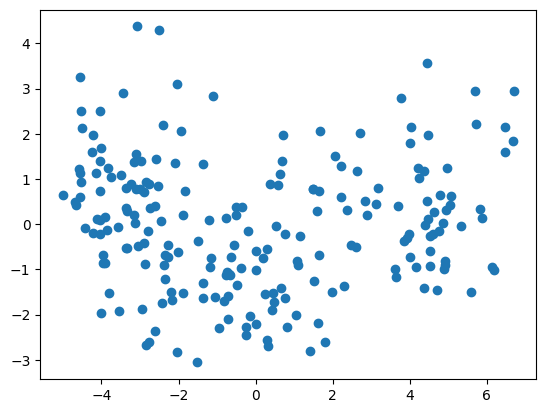

In [59]:
# [:,0] means give me the first item of every part of the 2D aray
# arr = [[1, 2], [3, 4], [5, 6]]
# arr[:,0]
# Returns [1, 3, 5]
# arr [:, :1]
# Returns [[1], [3], [5]]
plt.scatter(x_values[:,0], x_values[:,1])
plt.show()

# So we have basically reduced 7 features into 2
# Now we can have a 2D representation

# Putting it all together

In [60]:
kmeans_model = KMeans(n_clusters=3).fit(x_values)
clusters = kmeans_model.labels_
clusters = clusters.reshape(-1, 1)

kmeans_pca_df = pd.DataFrame(np.hstack((x_values, clusters)), columns=['PCA1', 'PCA2', 'Class'])
actual_pca_df = pd.DataFrame(np.hstack((x_values, df[cols[-1]].values.reshape(-1, 1))), columns=['PCA1', 'PCA2', 'Class'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[]

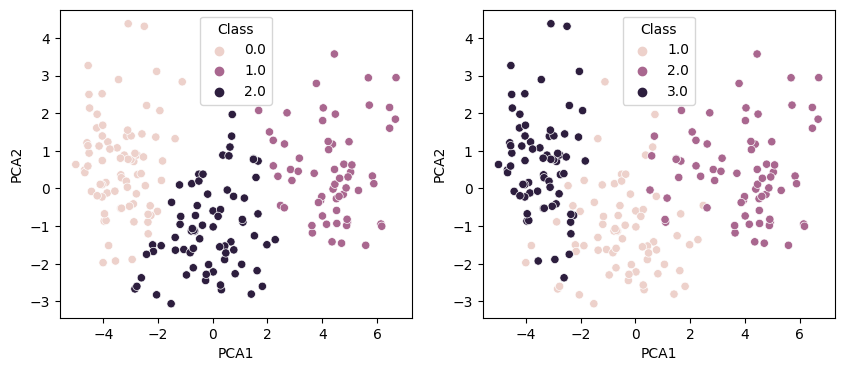

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.scatterplot(x='PCA1', y='PCA2', data=kmeans_pca_df, hue='Class', ax=ax1)
sns.scatterplot(x='PCA1', y='PCA2', data=actual_pca_df, hue='Class', ax=ax2)
plt.plot()

Overall, this model was able to categorize the data into clusters fairly well and it matches the clusters of the data with strong accuracy. However, along the borders of each cluster, the regions of overlap are innaccurate as expected.